In [1]:
# Data --> Business Problem --> Data Viz --> EDA --> Insights/Trends/Patterns/Observations --> Business Decisions
# Pre-requisite: Basic Python + Pandas + Numpy + DV

## Steps for EDA
- Importing necessary libraries
- Data Loading
- Data Understanding
- Problem Statement Understanding
- Missing Value Check
- Missing Value Imputation
- Univariate Analysis (One Variable at a time - Check the distribution of the column)
- Bivariate Analysis (Two Variable at a time - Relationship between the two columns)
- Multivariate Analysis (More than two variables at a time - Relationship between more than two columns)

## Importing Necessary Library

In [4]:
# Numerical and Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

## Data Loading

In [11]:
df=pd.read_csv("titanic_dataset.csv")
#https://drive.google.com/file/d/1plN-KWVopblsqOdgTYPn-O-zG5cWrkf7/view?usp=drive_link

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
#PassengerId: Unique id for every passenger like a primary key
#Survived: Whether a passenger survived or not
#Pclass: Passenger Class basically class of travel
#Name: Name of the passenger
#Sex: Gender of the passenger
#Age: Age of the passenger
#SibSp: (Siblings + Spouse) Count of Siblings and Spouse along with passenger is travelling
#Parch: (Parent + Children) Count of Parent and Children along with passenger is travelling
#Ticket: Ticket id 
#Fare: Fare paid by passenger for travel (in $s)
#Cabin: Cabin no. or room no. allocated
#Embarked: Boarding Station

### Business Problem: Identify the factors affecting the survival of passengers in the titanic incident

## Missing Value Check

In [24]:
# Percentage of missing values in each column
100*df.isnull().mean()

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [ ]:
# Missing Values Column -->  Cabin(~77%), Age(~20%), Embarked(~0.22%)
# Strategy:
# (a) Columns having high percentage of missing values (>40% or 50%), directly discard that column from the analysis.
# (b) Columns having missing values under acceptable range we prefer to impute them (replace with some values)
# (c) For numerical columns we prefer to use mean or median.(Median is preferred)
# (d) Median is not affected with the outliers. (Extreme values)
# (e) For categorical columns we prefer to use mode.

In [26]:
## Cabin column has more than 40% of missing values so straight away dropping it
df1=df.drop("Cabin",axis=1)
# axis =1 as we are dropping the column (axis=0 if you want to drop row)

In [30]:
# Percentage of missing values in each column
100*df1.isnull().mean()

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.224467
dtype: float64

In [32]:
arr=np.array([1,2,3,4,5])
print("Mean:",np.mean(arr))
print("Median:",np.median(arr))

Mean: 3.0
Median: 3.0


In [34]:
arr=np.array([1,2,3,4,100])
print("Mean:",np.mean(arr))
print("Median:",np.median(arr))

Mean: 22.0
Median: 3.0


In [36]:
med=df1["Age"].median()
df1["Age"]=df1["Age"].fillna(med) # Imputation
# Fillna function will replace/impute all missing values of age column with median value i.e. 28

In [38]:
# Percentage of missing values in each column
100*df1.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.224467
dtype: float64

In [57]:
df1["Embarked"].mode()[0]

'S'

In [44]:
df1["Age"].median()

28.0

In [50]:
mod=df1["Embarked"].mode()[0]
df1["Embarked"]=df1["Embarked"].fillna(mod) # Imputation
# Fillna function will replace/impute all missing values of Embarked column with mode value i.e. S

In [52]:
# Percentage of missing values in each column
100*df1.isnull().mean()

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

## Univariate Analysis

### Numerical

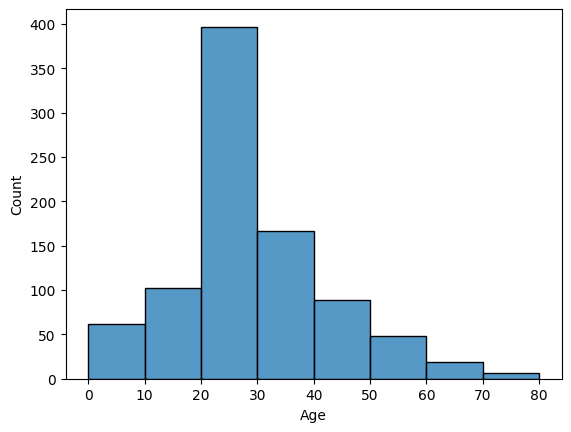

In [61]:
sns.histplot(x=df1["Age"],bins=[0,10,20,30,40,50,60,70,80])
plt.show()

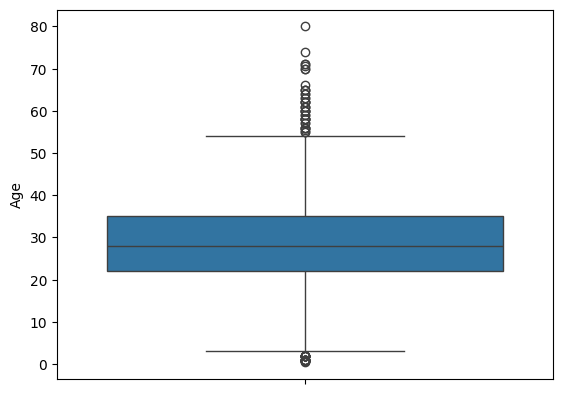

In [63]:
sns.boxplot(y=df1["Age"])
plt.show()
# Quartile = Quarter + Percentile
# Q1= First Quartile (25th Percentile) --> (Left/bottom side of the box)
# Q2= Second Quartile (50th Percentile) --> (Middle line of the box) (Median)
# Q3= Third Quartile (75th Percentile) --> (Right/top side of the box)
# Blackdots: Outliers (Extreme Values)
# Two Whiskers: (Emperical Relationships)
# Lower Whisker: Q1-1.5*(Q3-Q1) 
# Upper Whisker: Q3+1.5*(Q3-Q1)
# IQR : Inter Quartile Range( Q3-Q1)

### Categorical

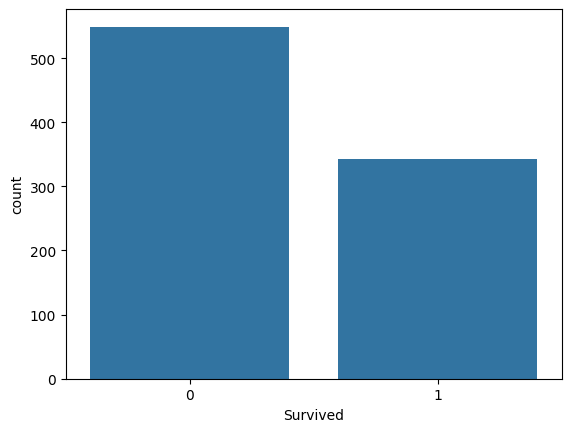

In [66]:
sns.countplot(x=df1["Survived"])
plt.show()

In [68]:
df1["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

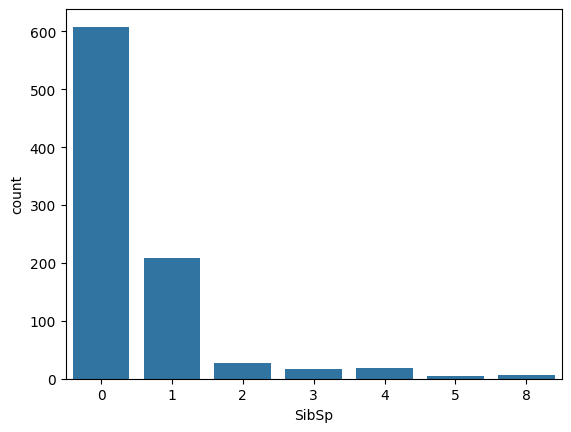

In [70]:
sns.countplot(x=df1["SibSp"])
plt.show()

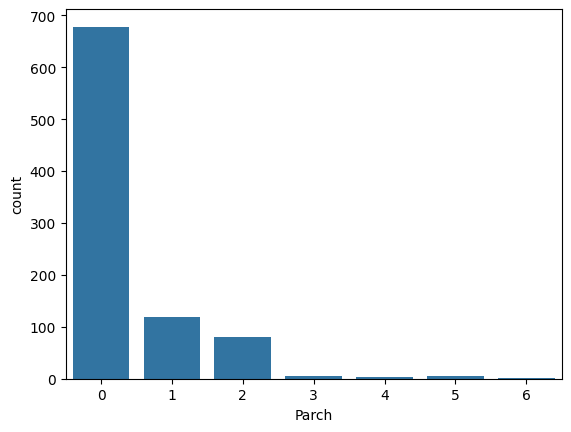

In [72]:
sns.countplot(x=df1["Parch"])
plt.show()

## Bivariate Analysis

### Numerical Vs Numerical

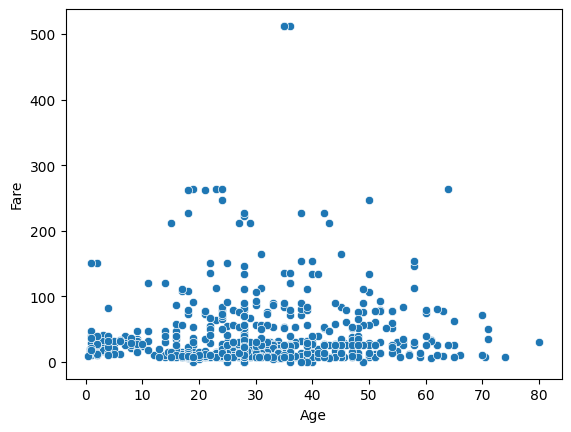

In [76]:
sns.scatterplot(x=df1["Age"],y=df1["Fare"])
plt.show()

### Categorical Vs Numerical

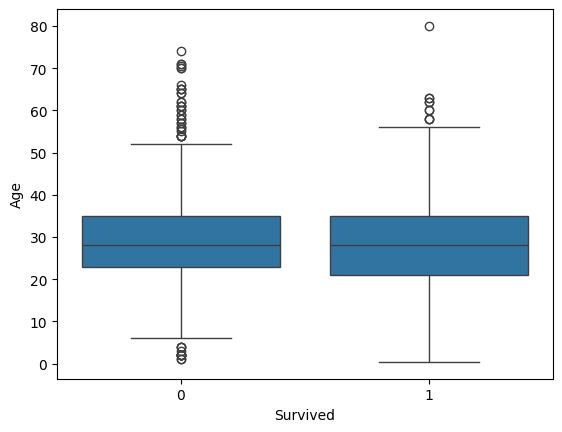

In [79]:
sns.boxplot(x=df1["Survived"],y=df1["Age"])
plt.show()

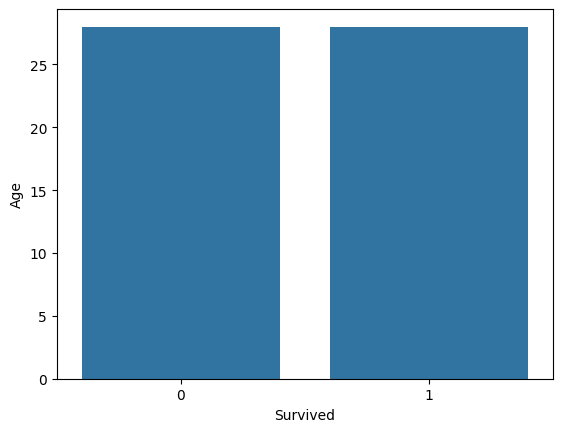

In [89]:
sns.barplot(x=df1["Survived"],y=df1["Age"],errorbar=None,estimator=np.median)
plt.show()

### Categorical Vs Categorical

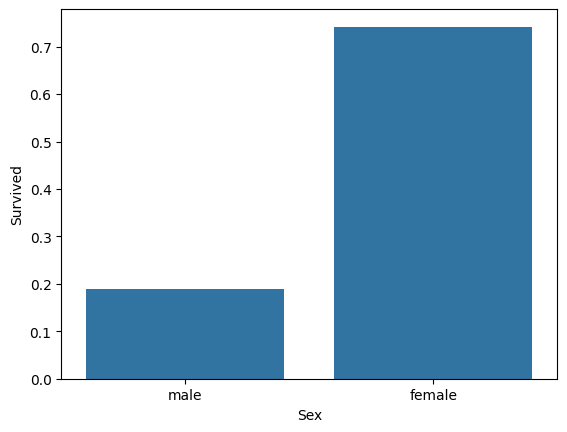

In [94]:
sns.barplot(x=df1["Sex"],y=df1["Survived"],errorbar=None)
plt.show()

In [96]:
df1.groupby("Sex")["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [104]:
#--> Survived --> 0,0,0,1,0,1,0,1,1 --> 4/9
#---> mean(Survived) ---> (0+0+0+1+0+1+0+1+1)/9

In [106]:
#(0+0+0+1+0+1+0+1+1) --> count of survived people/total people

In [102]:
df.isnull().mean()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Multivariate Analysis

In [109]:
# Correlation is ideal metric for Numerical columns, but if your columns are binary categorical still industry prefer to use correlation 
# as it approximately right but not ideal, but not all suitable for non-binary categorical columns

In [117]:
df1["Sex"]=df1["Sex"].map({"male":0,"female":1})

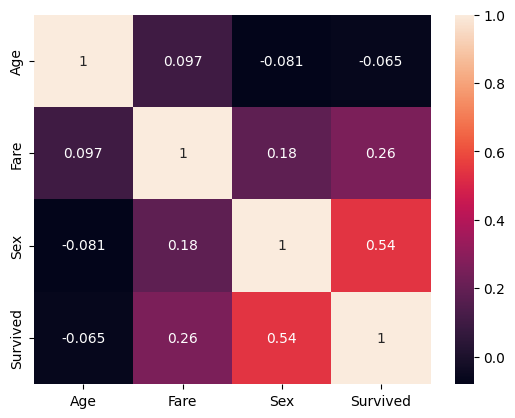

In [119]:
sns.heatmap(df1[["Age","Fare","Sex","Survived"]].corr(),annot=True)
plt.show()

In [ ]:
## Correlation represents strength of relationship between variables
## Correlation lies in the range of -1 to 1
#--> Theoritcal Interpretation
## Negative correlation  (0 to -1) shows inverse relationship
## Positive correlation (0 to 1) shows direct relationship
## 0 or near by correlation represents no relationship.
#--> Industrial Interpretation
## Correlation value >0.7 --> High Positive Corrleation
## 0.3<Correlation value<0.7 --> Weak Positive Corrleation
## Correlation value <-0.7 --> High Negative Corrleation
## -0.7<Correlation value<-0.3 --> Weak Negative Corrleation
## -0.3<Correlation value<0.3 --> No or almost no Corrleation